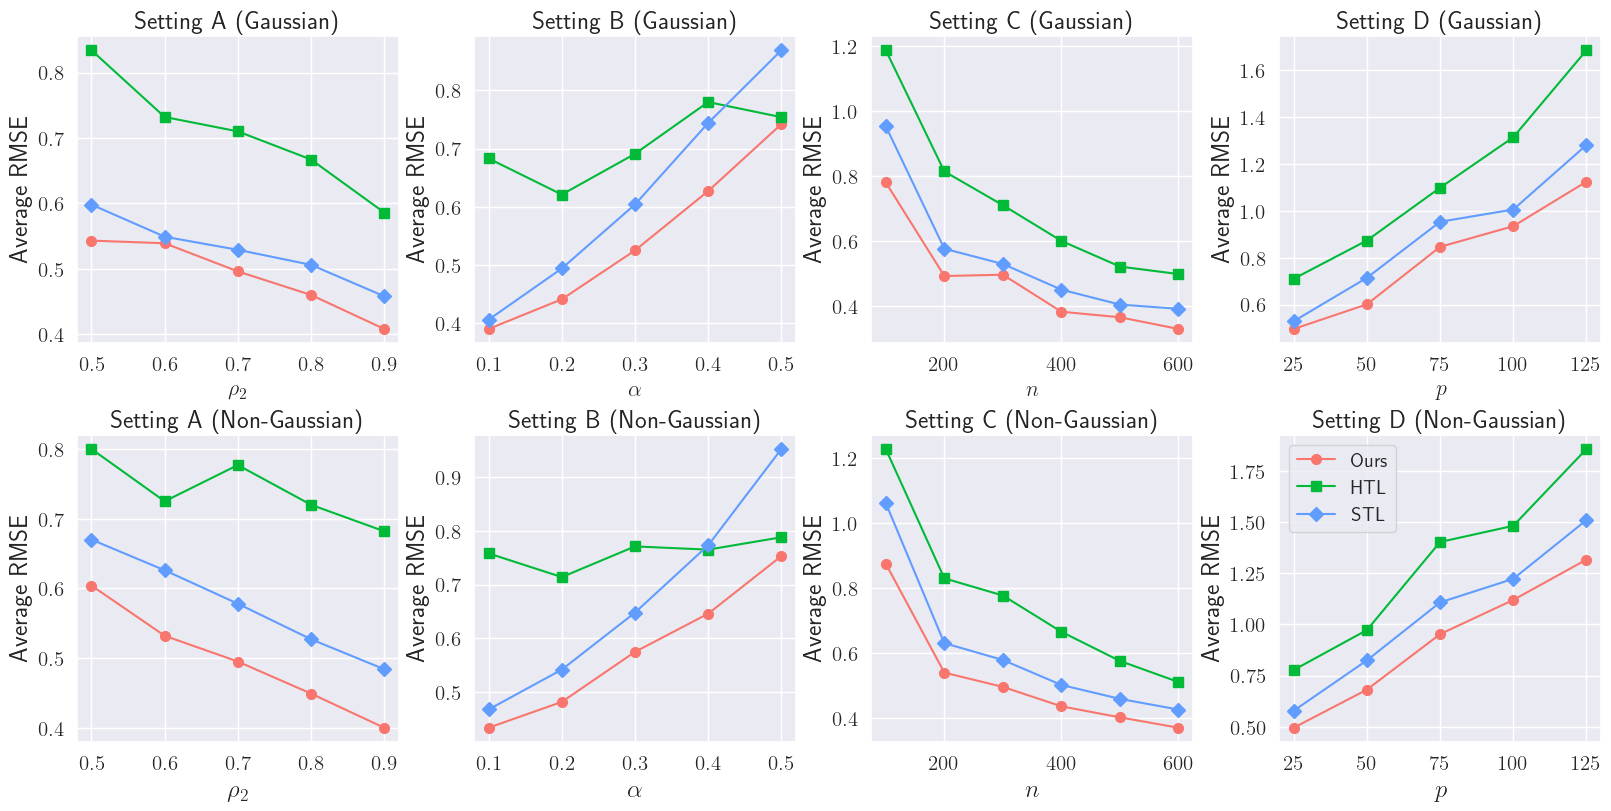

In [1]:
import os
import pandas as pd
import numpy as np
import re
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Define setting folders
setting_folders = ["Setting_A", "Setting_B", "Setting_C", "Setting_D"]

# Extract varying parameter value from filename
def extract_param(filename, setting):
    if setting == "Setting_A":
        match = re.search(r"rho2=(\d\.\d+)", filename)
    elif setting == "Setting_B":
        match = re.search(r"alpha=(\d\.\d+)", filename)
    elif setting == "Setting_C":
        match = re.search(r"nt=(\d+)", filename)
    elif setting == "Setting_D":
        match = re.search(r"p2=(\d+)", filename)
    else:
        return None
    return float(match.group(1)) if match else None

# Collect mean/std RMSE statistics
def collect_summary_stats(base_dir, setting_list):
    all_stats = []
    for setting in setting_list:
        setting_path = Path(base_dir) / setting
        for file in setting_path.rglob("*.csv"):
            df = pd.read_csv(file)
            avg_rmse = (df["Loss_s"] + df["Loss_t"]) / 2
            param_value = extract_param(file.name, setting)

            if param_value is not None:
                method = "Unknown"
                if "proposed" in file.name.lower():
                    method = "Proposed"
                elif "htl" in file.name.lower():
                    method = "HTL"
                elif "sdl" in file.name.lower():
                    method = "SDL"

                stats = {
                    "base_dir": base_dir,
                    "setting": setting,
                    "method": method,
                    "param": param_value,
                    "mean_rmse": round(avg_rmse.mean(), 3),
                    "std_rmse": round(avg_rmse.std(), 3)
                }
                all_stats.append(stats)
    return pd.DataFrame(all_stats)

# Load results from both Gaussian and Non-Gaussian settings
gaussian_df = collect_summary_stats("Results_gaussian", setting_folders)
nongaussian_df = collect_summary_stats("Results_nongaussian", setting_folders)

# Add distribution label
gaussian_df["distribution"] = "gaussian"
nongaussian_df["distribution"] = "nongaussian"

# Combine results
combined_df = pd.concat([gaussian_df, nongaussian_df], ignore_index=True)

# Plotting setup
plt.rcParams['text.usetex'] = True
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5)

methods = ["Proposed", "HTL", "SDL"]
marker_dict = {"Proposed": "o", "HTL": "s", "SDL": "D"}
color_dict = {"Proposed": "#F8766D", "HTL": "#00BA38", "SDL": "#619CFF"}

line_kws = {
    method: {
        "color": color_dict[method],
        "marker": marker_dict[method],
        "markersize": 7,
        "linewidth": 1.5
    }
    for method in methods
}

# Create 2x4 subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8), constrained_layout=True)
axes = axes.flatten()

shared_settings = ["Setting A", "Setting B", "Setting C", "Setting D"]
xlabels = [r"$\rho_2$", r"$\alpha$", r"$n$", r"$p$"]

# Gaussian plots
for i, (setting, xlabel) in enumerate(zip(shared_settings, xlabels)):
    ax = axes[i]
    g_df = combined_df[
        (combined_df["setting"] == setting.replace(" ", "_")) &
        (combined_df["distribution"] == "gaussian")
    ]
    
    for method in methods:
        sub = g_df[g_df["method"] == method]
        ax.plot(sub["param"], sub["mean_rmse"], label=method, **line_kws[method])

    ax.set_title(rf"{setting} (Gaussian)", fontsize=18)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel("Average RMSE", fontsize=18)
    ax.tick_params(labelsize=15)

# Non-Gaussian plots
for i, (setting, xlabel) in enumerate(zip(shared_settings, xlabels)):
    ax = axes[i + 4]
    ng_df = combined_df[
        (combined_df["setting"] == setting.replace(" ", "_")) &
        (combined_df["distribution"] == "nongaussian")
    ]
    
    for method in methods:
        sub = ng_df[ng_df["method"] == method]
        ax.plot(sub["param"], sub["mean_rmse"], label=method, **line_kws[method])

    ax.set_title(rf"{setting} (Non-Gaussian)", fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    ax.set_ylabel("Average RMSE", fontsize=18)
    ax.tick_params(labelsize=15)

# Modify legend labels
display_name_map = {"Proposed": "Ours", "HTL": "HTL", "SDL": "STL"}
handles, labels = axes[-1].get_legend_handles_labels()
custom_labels = [display_name_map.get(label, label) for label in labels]

# Add legend only to the last subplot
# Add legend inside the last subplot
axes[-1].legend(
    labels=["Ours", "HTL", "STL"],
    loc='upper left',
    fontsize=14,
    frameon=True
)

#axes[-1].legend(handles, custom_labels, loc="center left", bbox_to_anchor=(1.0, 0.5), fontsize=14, frameon=False)

# Display the figure
plt.savefig("mean_results_plot.pdf", format="pdf", bbox_inches='tight')

plt.show()


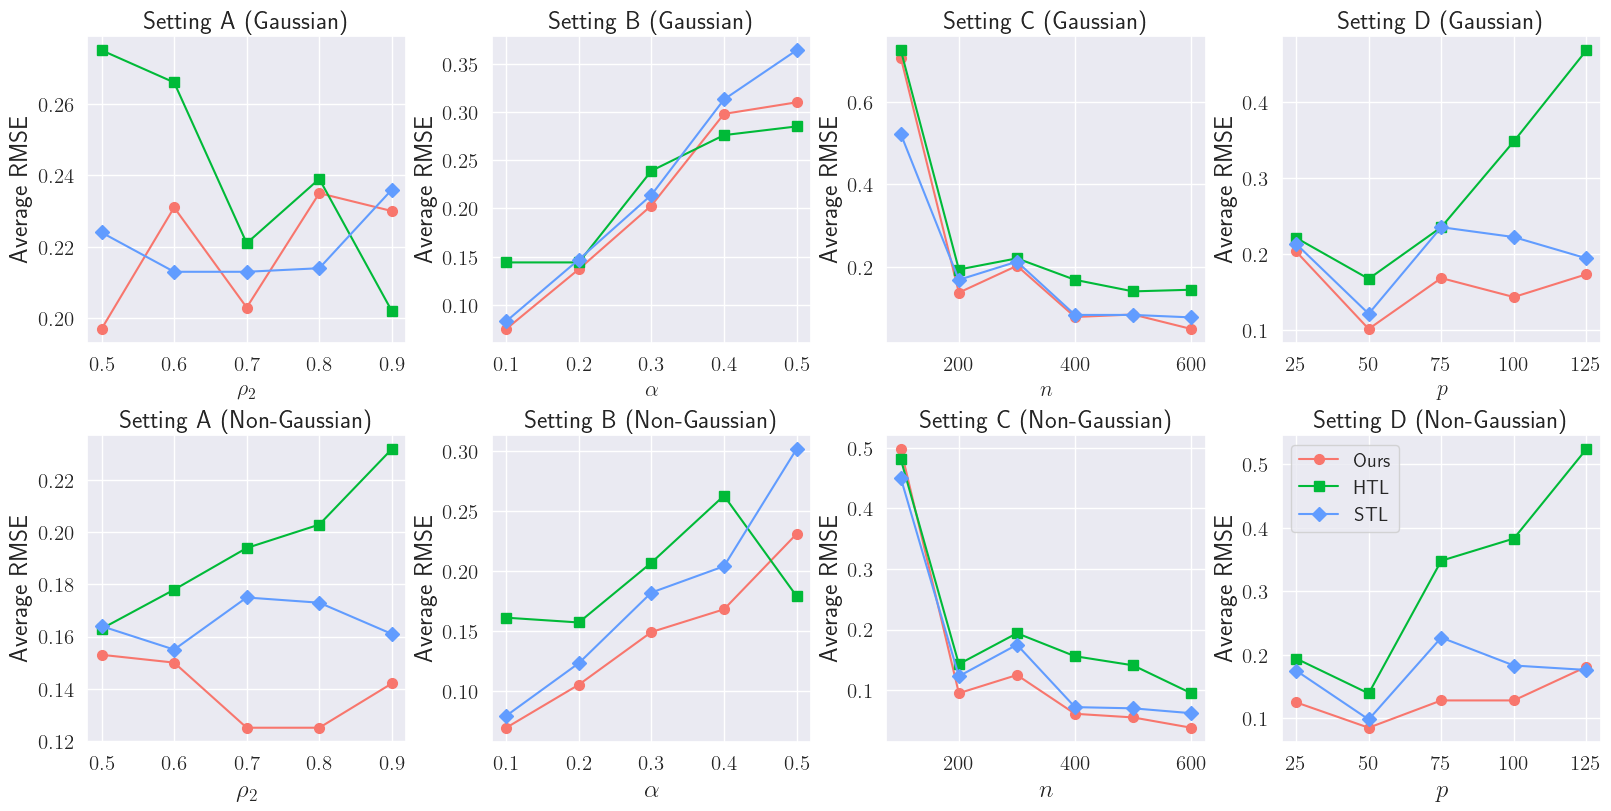

In [2]:
import os
import pandas as pd
import numpy as np
import re
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Define setting folders
setting_folders = ["Setting_A", "Setting_B", "Setting_C", "Setting_D"]

# Extract varying parameter value from filename
def extract_param(filename, setting):
    if setting == "Setting_A":
        match = re.search(r"rho2=(\d\.\d+)", filename)
    elif setting == "Setting_B":
        match = re.search(r"alpha=(\d\.\d+)", filename)
    elif setting == "Setting_C":
        match = re.search(r"nt=(\d+)", filename)
    elif setting == "Setting_D":
        match = re.search(r"p2=(\d+)", filename)
    else:
        return None
    return float(match.group(1)) if match else None

# Collect mean/std RMSE statistics
def collect_summary_stats(base_dir, setting_list):
    all_stats = []
    for setting in setting_list:
        setting_path = Path(base_dir) / setting
        for file in setting_path.rglob("*.csv"):
            df = pd.read_csv(file)
            avg_rmse = (df["Loss_s"] + df["Loss_t"]) / 2
            param_value = extract_param(file.name, setting)

            if param_value is not None:
                method = "Unknown"
                if "proposed" in file.name.lower():
                    method = "Proposed"
                elif "htl" in file.name.lower():
                    method = "HTL"
                elif "sdl" in file.name.lower():
                    method = "SDL"

                stats = {
                    "base_dir": base_dir,
                    "setting": setting,
                    "method": method,
                    "param": param_value,
                    "mean_rmse": round(avg_rmse.mean(), 3),
                    "std_rmse": round(avg_rmse.std(), 3)
                }
                all_stats.append(stats)
    return pd.DataFrame(all_stats)

# Load results from both Gaussian and Non-Gaussian settings
gaussian_df = collect_summary_stats("Results_gaussian", setting_folders)
nongaussian_df = collect_summary_stats("Results_nongaussian", setting_folders)

# Add distribution label
gaussian_df["distribution"] = "gaussian"
nongaussian_df["distribution"] = "nongaussian"

# Combine results
combined_df = pd.concat([gaussian_df, nongaussian_df], ignore_index=True)

# Plotting setup
plt.rcParams['text.usetex'] = True
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5)

methods = ["Proposed", "HTL", "SDL"]
marker_dict = {"Proposed": "o", "HTL": "s", "SDL": "D"}
color_dict = {"Proposed": "#F8766D", "HTL": "#00BA38", "SDL": "#619CFF"}

line_kws = {
    method: {
        "color": color_dict[method],
        "marker": marker_dict[method],
        "markersize": 7,
        "linewidth": 1.5
    }
    for method in methods
}

# Create 2x4 subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8), constrained_layout=True)
axes = axes.flatten()

shared_settings = ["Setting A", "Setting B", "Setting C", "Setting D"]
xlabels = [r"$\rho_2$", r"$\alpha$", r"$n$", r"$p$"]

# Gaussian plots
for i, (setting, xlabel) in enumerate(zip(shared_settings, xlabels)):
    ax = axes[i]
    g_df = combined_df[
        (combined_df["setting"] == setting.replace(" ", "_")) &
        (combined_df["distribution"] == "gaussian")
    ]
    
    for method in methods:
        sub = g_df[g_df["method"] == method]
        ax.plot(sub["param"], sub["std_rmse"], label=method, **line_kws[method])

    ax.set_title(rf"{setting} (Gaussian)", fontsize=18)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel("Average RMSE", fontsize=18)
    ax.tick_params(labelsize=15)

# Non-Gaussian plots
for i, (setting, xlabel) in enumerate(zip(shared_settings, xlabels)):
    ax = axes[i + 4]
    ng_df = combined_df[
        (combined_df["setting"] == setting.replace(" ", "_")) &
        (combined_df["distribution"] == "nongaussian")
    ]
    
    for method in methods:
        sub = ng_df[ng_df["method"] == method]
        ax.plot(sub["param"], sub["std_rmse"], label=method, **line_kws[method])

    ax.set_title(rf"{setting} (Non-Gaussian)", fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    ax.set_ylabel("Average RMSE", fontsize=18)
    ax.tick_params(labelsize=15)

# Modify legend labels
display_name_map = {"Proposed": "Ours", "HTL": "HTL", "SDL": "STL"}
handles, labels = axes[-1].get_legend_handles_labels()
custom_labels = [display_name_map.get(label, label) for label in labels]

# Add legend only to the last subplot
# Add legend inside the last subplot
axes[-1].legend(
    labels=["Ours", "HTL", "STL"],
    loc='upper left',
    fontsize=14,
    frameon=True
)

#axes[-1].legend(handles, custom_labels, loc="center left", bbox_to_anchor=(1.0, 0.5), fontsize=14, frameon=False)

# Display the figure
plt.savefig("std_results_plot.pdf", format="pdf", bbox_inches='tight')

plt.show()


In [5]:
print(combined_df.to_string())

                base_dir    setting    method  param  mean_rmse  std_rmse distribution
0       Results_gaussian  Setting_A  Proposed    0.5      0.543     0.197     gaussian
1       Results_gaussian  Setting_A       HTL    0.5      0.834     0.275     gaussian
2       Results_gaussian  Setting_A       SDL    0.5      0.598     0.224     gaussian
3       Results_gaussian  Setting_A  Proposed    0.6      0.539     0.231     gaussian
4       Results_gaussian  Setting_A       HTL    0.6      0.732     0.266     gaussian
5       Results_gaussian  Setting_A       SDL    0.6      0.549     0.213     gaussian
6       Results_gaussian  Setting_A  Proposed    0.7      0.496     0.203     gaussian
7       Results_gaussian  Setting_A       HTL    0.7      0.710     0.221     gaussian
8       Results_gaussian  Setting_A       SDL    0.7      0.529     0.213     gaussian
9       Results_gaussian  Setting_A  Proposed    0.8      0.460     0.235     gaussian
10      Results_gaussian  Setting_A       H

In [8]:
# Group by setting/param/distribution
improvement_records = []

for (setting, param, dist), group in combined_df.groupby(["setting", "param", "distribution"]):
    methods_present = group["method"].unique()
    if "Proposed" in methods_present:
        proposed_val = group[group["method"] == "Proposed"]["mean_rmse"].values[0]
        for other in ["HTL", "SDL"]:
            if other in methods_present:
                other_val = group[group["method"] == other]["mean_rmse"].values[0]
                improve = 100 * (other_val - proposed_val) / other_val
                improvement_records.append({
                    "setting": setting,
                    "param": param,
                    "distribution": dist,
                    "compare_to": other,
                    "improvement_percent": round(improve, 3)
                })
            else:
                print(f"[WARNING] Missing method: {other} in {setting}, param={param}, distribution={dist}")
    else:
        print(f"[WARNING] Missing method: Proposed in {setting}, param={param}, distribution={dist}")

# Convert to DataFrame and print
improvement_df = pd.DataFrame(improvement_records)
print(improvement_df.to_string())


      setting  param distribution compare_to  improvement_percent
0   Setting_A    0.5     gaussian        HTL               34.892
1   Setting_A    0.5     gaussian        SDL                9.197
2   Setting_A    0.5  nongaussian        HTL               24.500
3   Setting_A    0.5  nongaussian        SDL                9.851
4   Setting_A    0.6     gaussian        HTL               26.366
5   Setting_A    0.6     gaussian        SDL                1.821
6   Setting_A    0.6  nongaussian        HTL               26.621
7   Setting_A    0.6  nongaussian        SDL               15.016
8   Setting_A    0.7     gaussian        HTL               30.141
9   Setting_A    0.7     gaussian        SDL                6.238
10  Setting_A    0.7  nongaussian        HTL               36.293
11  Setting_A    0.7  nongaussian        SDL               14.360
12  Setting_A    0.8     gaussian        HTL               31.034
13  Setting_A    0.8     gaussian        SDL                9.091
14  Settin